In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score
from sklearn.metrics import roc_auc_score, roc_curve,precision_score,recall_score,precision_recall_curve
from sklearn.decomposition import PCA

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [ ]:
df=pd.read_csv('data.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


Dropping redundant columns and variables that will not help in the analysis

In [ ]:
df.drop(columns=['id','Unnamed: 32'],inplace=True)
df.shape

(569, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
pd.DataFrame(df.corr(numeric_only=True))

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [ ]:
df.describe().round(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,...,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,...,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,...,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,...,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,...,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,...,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,...,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


# Exploratory Data Analysis

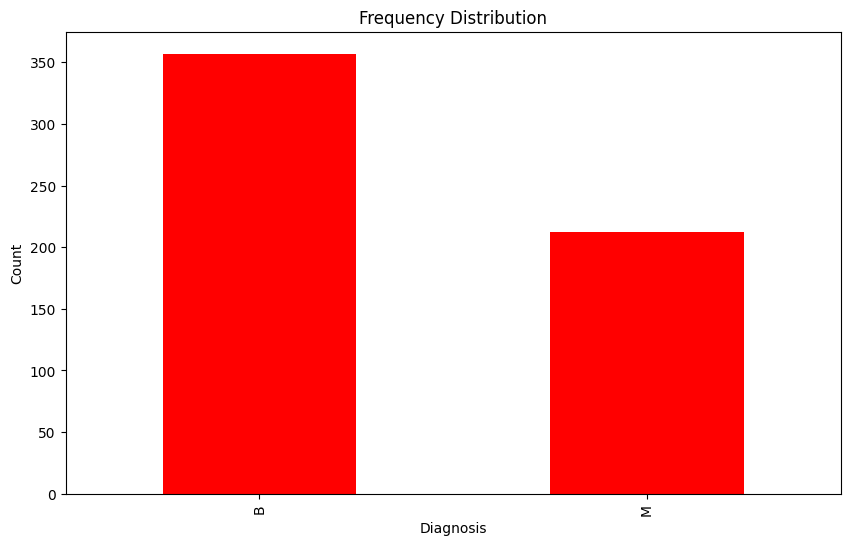

In [ ]:
counts = df['diagnosis'].value_counts()

plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='red')

plt.title('Frequency Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

plt.show()

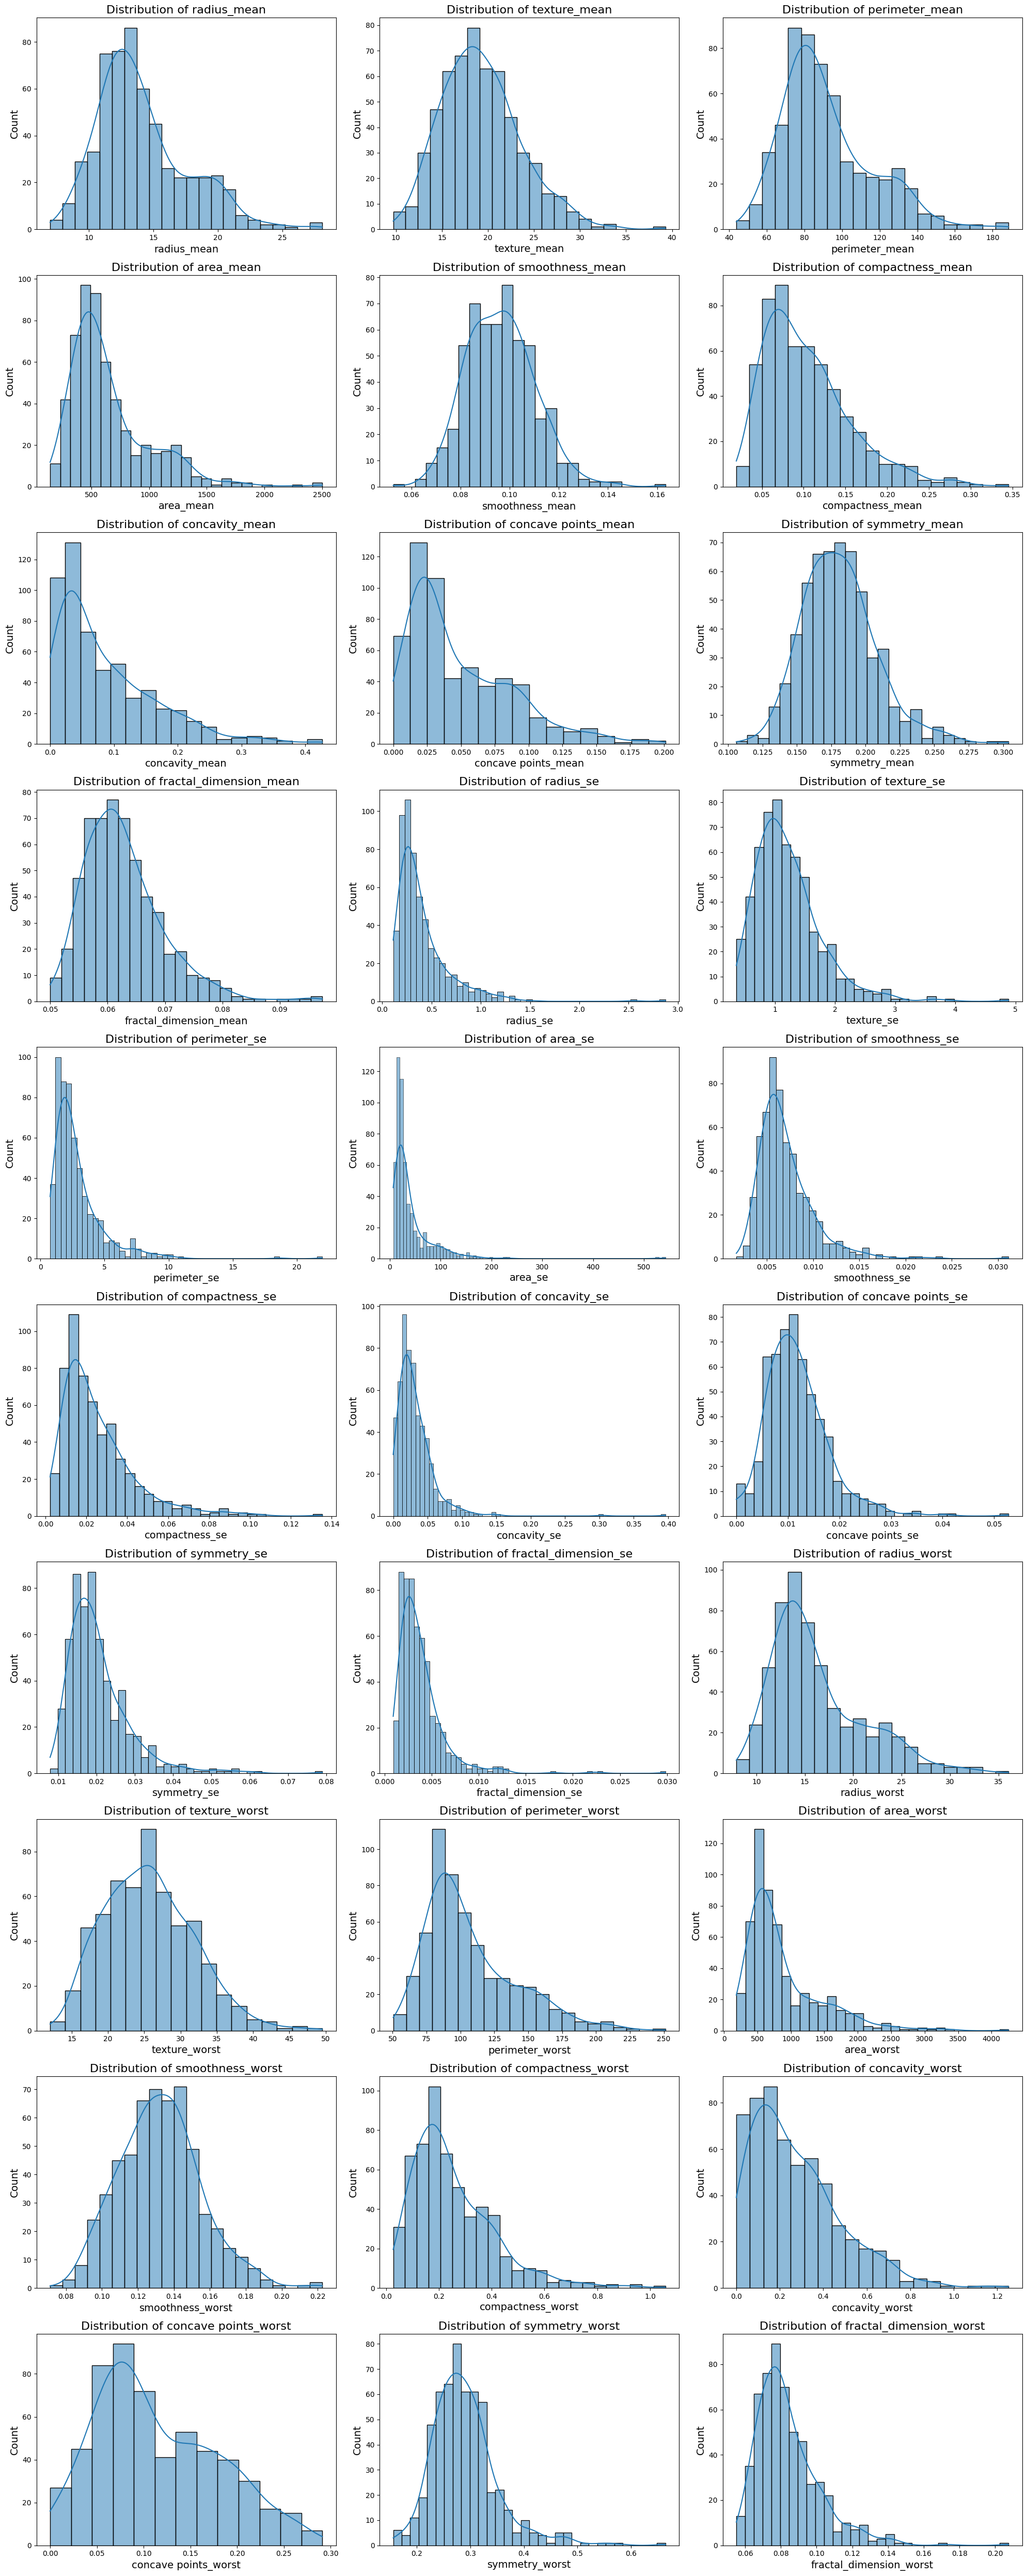

In [ ]:
cols=df.columns[1:]
fig, axes = plt.subplots(nrows = 10, ncols = 3, figsize = (20,50))

for i, ax in zip(cols, axes.flatten()):
    sns.histplot(data=df, ax=ax,x=i,kde=True)

    # Adding titles and labels
    ax.set_title(f'Distribution of {i}', fontsize=16)
    ax.set_xlabel(i, fontsize=14)
    ax.set_ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()

# Exploratory Data Analysis

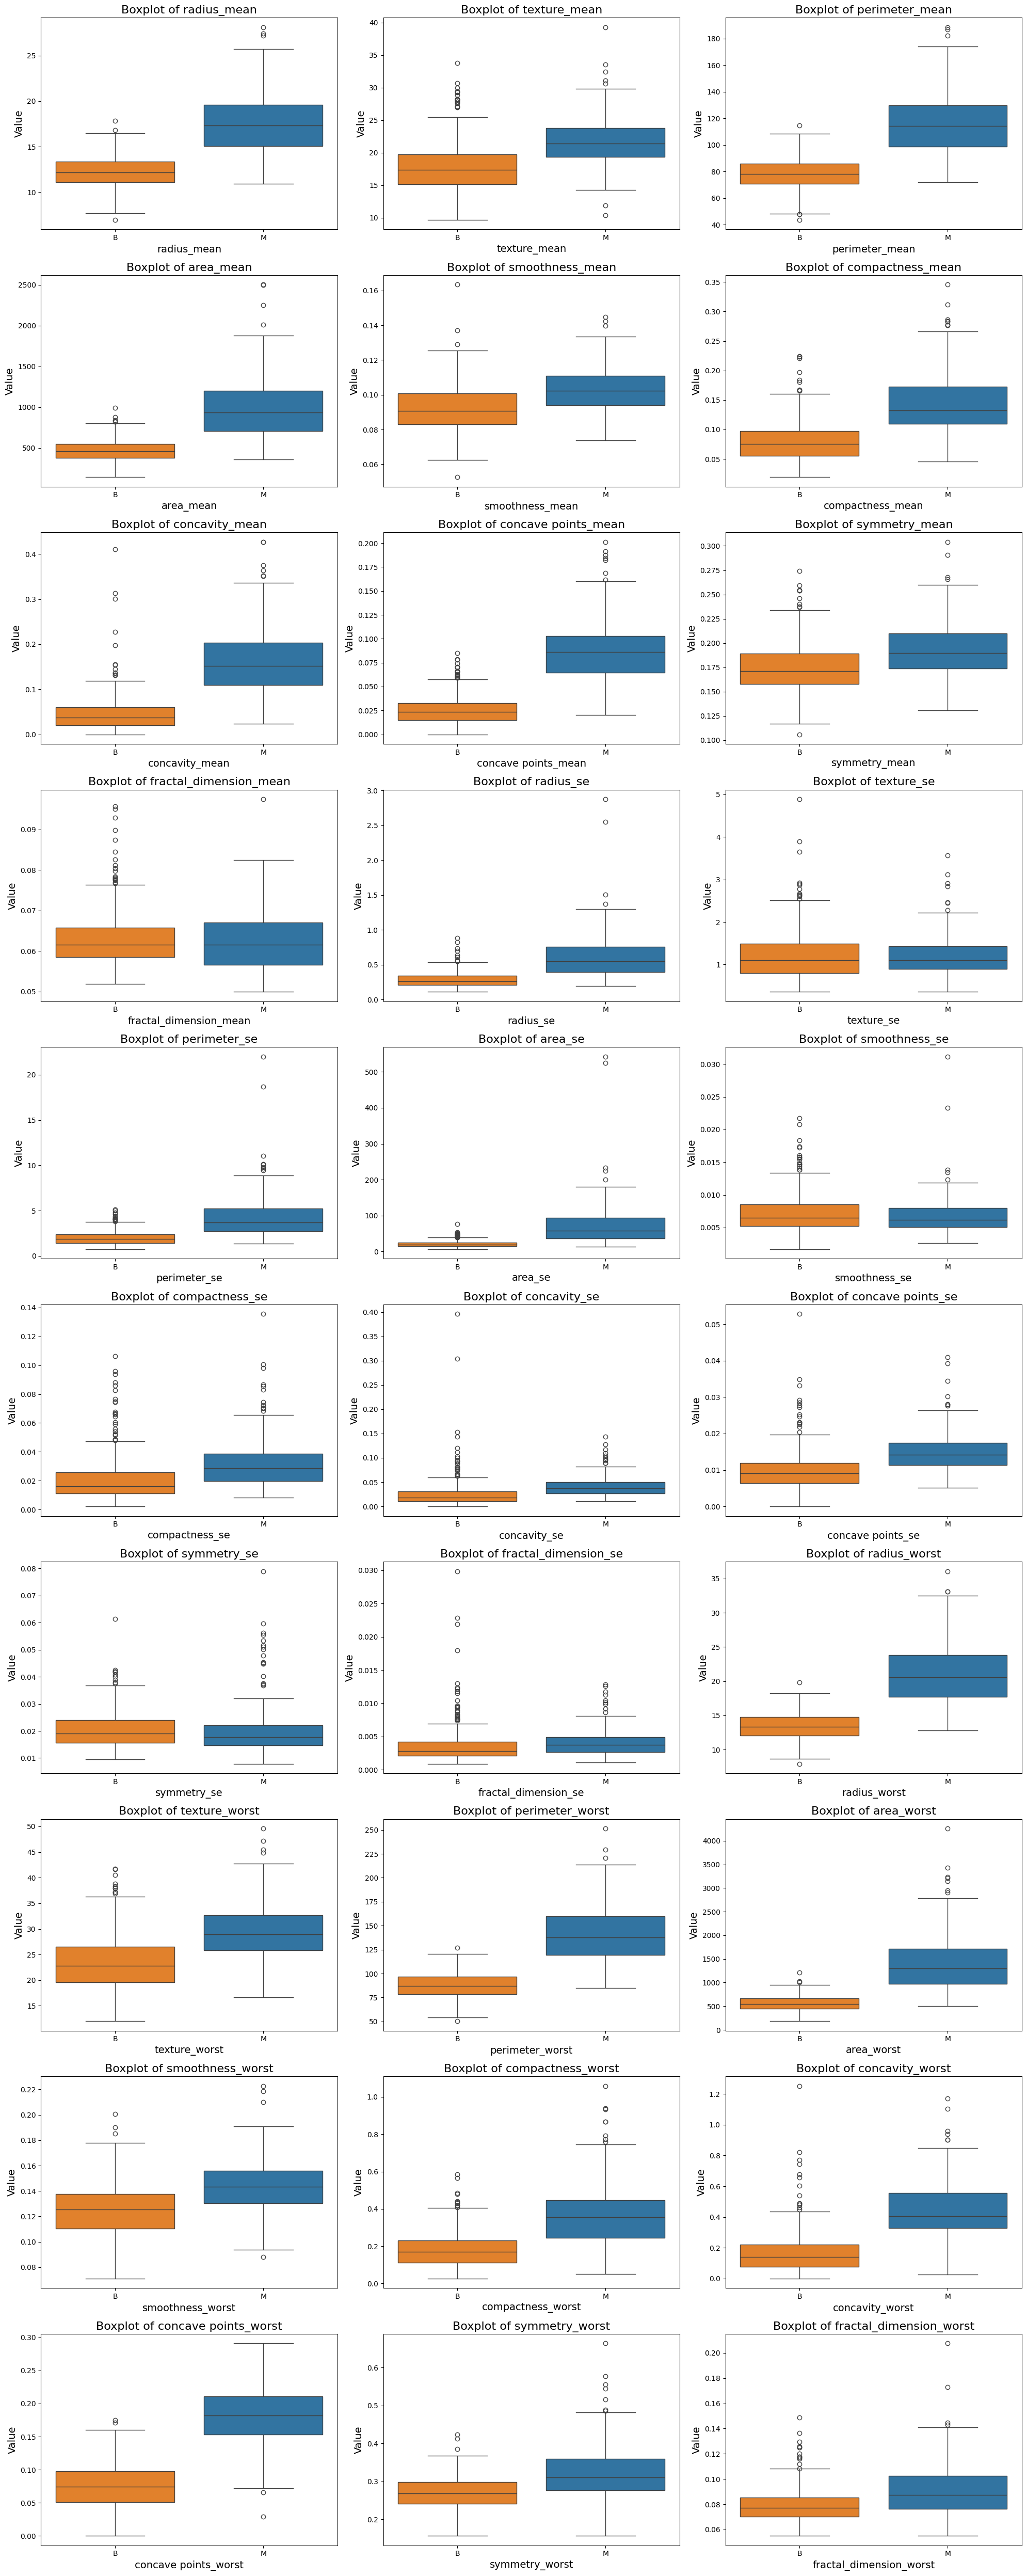

In [ ]:
cols=df.columns[1:]
fig, axes = plt.subplots(nrows = 10, ncols = 3, figsize = (20,50))

for i, ax in zip(cols, axes.flatten()):
    sns.boxplot(data=df, ax=ax,x='diagnosis',y=i,hue='diagnosis',order=['B','M'])

    # Adding titles and labels
    ax.set_title(f'Boxplot of {i}', fontsize=16)
    ax.set_xlabel(i, fontsize=14)
    ax.set_ylabel('Value', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
X=df.drop(columns=['diagnosis'])
Y=df['diagnosis']

In [ ]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
sc=StandardScaler()
X=pd.DataFrame(sc.fit_transform(X),columns=sc.get_feature_names_out())
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


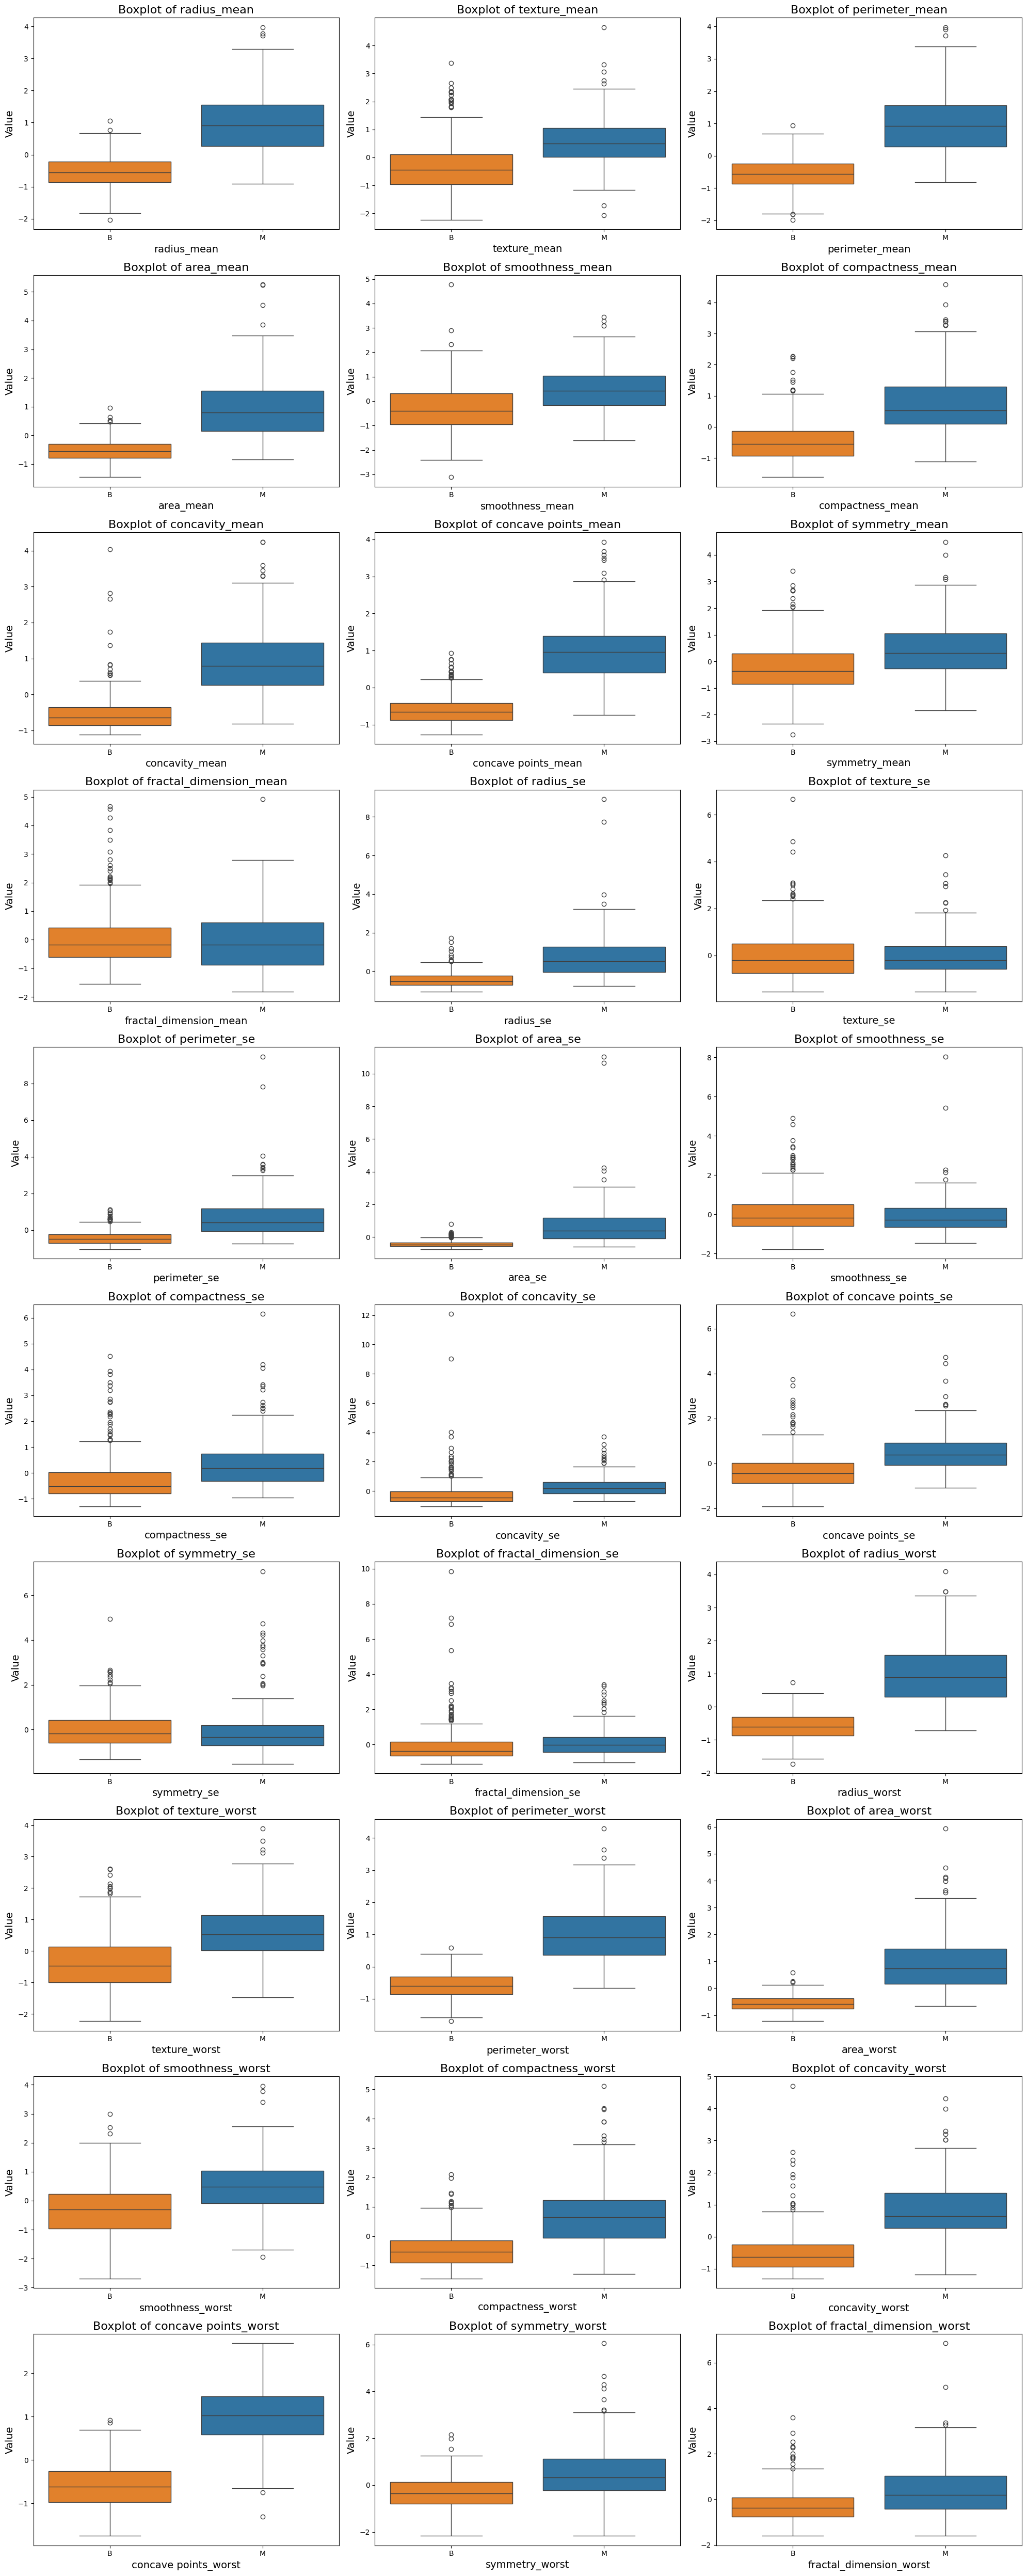

In [ ]:
cols=X.columns
fig, axes = plt.subplots(nrows = 10, ncols = 3, figsize = (20,50))

for i, ax in zip(cols, axes.flatten()):
    sns.boxplot(x=Y , y=X[i],hue=Y,order=['B','M'],ax=ax)

    # Adding titles and labels
    ax.set_title(f'Boxplot of {i}', fontsize=16)
    ax.set_xlabel(i, fontsize=14)
    ax.set_ylabel('Value', fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
df.shape

(569, 31)

In [ ]:
colmn=X.columns[1:]
outlier_data=pd.DataFrame()
for col in colmn:
  smth=X[(X[col]>3) | (X[col]<-3)]
  outlier_data=pd.concat([outlier_data,smth])
  outlier_data=outlier_data.drop_duplicates()
outlier_data


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
219,1.534446,3.067156,1.484123,1.615766,-0.865392,0.164101,0.322671,0.450127,-1.400570,-1.370484,...,2.408538,3.213360,2.172543,2.806362,0.369598,0.988783,0.610780,0.729259,-0.303748,-0.458057
232,-0.825712,3.378983,-0.872369,-0.762473,-1.320851,-1.300090,-1.052512,-1.095861,0.121873,-0.640418,...,-0.809525,2.622237,-0.858464,-0.720187,-1.421536,-1.179499,-1.194624,-1.287960,0.016573,-0.602692
239,0.946536,4.651889,0.882746,0.755709,0.125231,0.482486,0.664167,1.010888,-0.009560,-0.444789,...,1.292363,3.125425,1.010895,0.927153,0.181104,0.758501,0.249047,1.400752,-0.077258,0.056202
259,0.398389,3.320807,0.483201,0.256000,0.707364,1.128731,1.083503,0.904617,1.020006,0.524852,...,0.459891,3.885905,0.567086,0.271451,2.451803,1.922000,1.430197,1.321574,0.988859,2.020138
82,3.150487,1.307894,3.275896,3.478653,0.707364,3.073153,3.077232,3.497170,0.063458,0.711976,...,2.843411,1.293432,3.110797,2.955784,1.092890,2.247704,1.801046,2.620403,-0.882913,1.172276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0.219460,0.754052,0.417297,0.085638,0.221305,2.239288,2.316401,1.243034,0.837458,0.876418,...,0.016734,0.308227,0.540279,-0.084174,0.417818,2.892750,3.021056,2.023520,-0.056227,1.748601
31,-0.649623,-0.137215,-0.578271,-0.609460,1.034726,0.895628,0.414323,0.074825,1.786704,2.153679,...,0.114063,0.397791,0.361564,0.014269,1.373440,2.056226,2.031327,0.608969,3.009467,3.117372
35,0.742046,0.535307,0.746818,0.610375,-0.018523,0.554502,0.577537,0.290462,0.308072,-0.884246,...,0.774656,0.544350,0.781544,0.612486,1.049055,0.822115,1.289150,1.015519,3.174481,0.132121
323,1.764497,0.516691,1.809525,1.732374,1.468835,1.575986,2.105477,2.617595,2.765157,0.553204,...,1.870123,1.006827,1.901492,1.858847,1.176179,1.240059,1.257966,2.343279,4.298838,1.022654


In [ ]:
gg=outlier_data.index

In [ ]:
df.drop(index=gg,axis=0,inplace=True)

In [ ]:
df.shape

(495, 31)

In [ ]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Y)

In [ ]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

# KNN

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.4,random_state=2)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(341, 30)
(228, 30)
(341,)
(228,)


## Uniform Weights

In [ ]:
scores=[]
for k in range(1,(xtrain.shape[0]//10)):
  knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
  knn.fit(xtrain,ytrain)
  ypred=knn.predict(xtest)
  scores.append(accuracy_score(ytest,ypred))
scores

[0.9429824561403509,
 0.9517543859649122,
 0.9649122807017544,
 0.9649122807017544,
 0.9692982456140351,
 0.9605263157894737,
 0.9692982456140351,
 0.9605263157894737,
 0.9605263157894737,
 0.9517543859649122,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9385964912280702,
 0.9429824561403509,
 0.9385964912280702,
 0.9385964912280702,
 0.9429824561403509,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702]

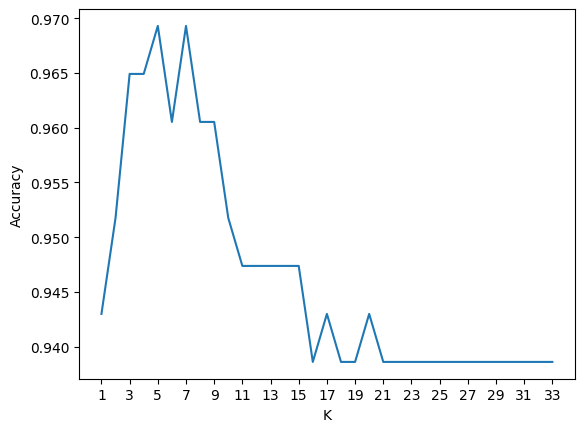

In [ ]:
plt.plot(range(1,(xtrain.shape[0]//10)),scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(range(1,(xtrain.shape[0]//10),2))
plt.show()

In [ ]:
m=max(scores)
m
lstk=[]
for i in range(len(scores)):
  if scores[i]==max(scores):
    lstk.append(i+1)
best_k=max(lstk)

In [ ]:
best_k

7

In [ ]:
scores_tr=[]
for k in range(1,(xtrain.shape[0]//10)):
  knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
  sc=np.mean(cross_val_score(knn,xtrain,ytrain,scoring='accuracy',cv=5))
  scores_tr.append(sc)
scores_tr

[0.958994032395567,
 0.9501278772378517,
 0.9589514066496164,
 0.9501705029838023,
 0.95306905370844,
 0.9589514066496164,
 0.9589087809036659,
 0.9589087809036659,
 0.9647485080988918,
 0.9588661551577153,
 0.9618073316283036,
 0.9618073316283036,
 0.9588661551577153,
 0.9618073316283036,
 0.9588661551577152,
 0.9618073316283036,
 0.9618073316283036,
 0.9618073316283036,
 0.9618073316283036,
 0.9618073316283036,
 0.9588661551577153,
 0.9618073316283036,
 0.9559249786871271,
 0.9529838022165388,
 0.9529838022165388,
 0.9559249786871271,
 0.9529838022165388,
 0.9559676044330777,
 0.9559249786871271,
 0.9559676044330777,
 0.9530264279624895,
 0.95306905370844,
 0.9471867007672634]

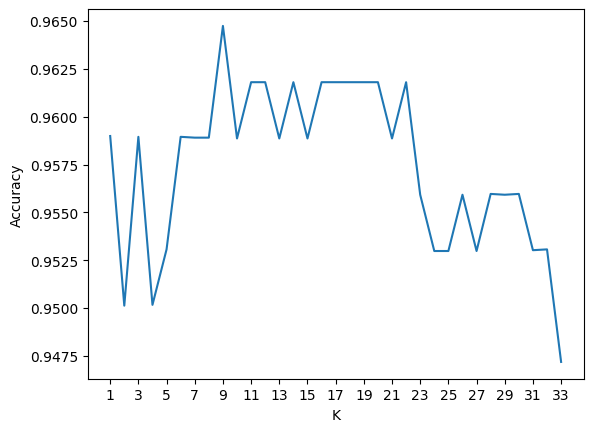

In [ ]:
plt.plot(range(1,(xtrain.shape[0]//10)),scores_tr)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(range(1,(xtrain.shape[0]//10),2))
plt.show()

In [ ]:
m=max(scores_tr)
m
lstk=[]
for i in range(len(scores_tr)):
  if scores_tr[i]==max(scores_tr):
    lstk.append(i+1)
best_k=max(lstk)

In [ ]:
best_k

9

In [ ]:
#Best value of k=5

## Distance Based Weights


In [ ]:
scores=[]
for k in range(1,(xtrain.shape[0]//10)):
  knn=KNeighborsClassifier(n_neighbors=k,weights='distance')
  knn.fit(xtrain,ytrain)
  ypred=knn.predict(xtest)
  scores.append(accuracy_score(ytest,ypred))
scores

[0.9429824561403509,
 0.9429824561403509,
 0.9649122807017544,
 0.9605263157894737,
 0.9692982456140351,
 0.9736842105263158,
 0.9692982456140351,
 0.9692982456140351,
 0.9605263157894737,
 0.9605263157894737,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9429824561403509,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9429824561403509,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702]

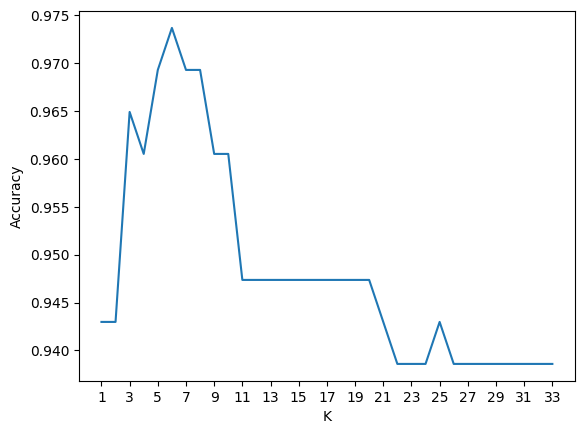

In [ ]:
plt.plot(range(1,(xtrain.shape[0]//10)),scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(range(1,(xtrain.shape[0]//10),2))
plt.show()

In [ ]:
m=max(scores)
m
lstk=[]
for i in range(len(scores)):
  if scores[i]==max(scores):
    lstk.append(i+1)
best_k=max(lstk)

In [ ]:
best_k

6

In [ ]:
scores_tr=[]
for k in range(1,(xtrain.shape[0]//10)):
  knn=KNeighborsClassifier(n_neighbors=k,weights='distance')
  sc=np.mean(cross_val_score(knn,xtrain,ytrain,scoring='accuracy',cv=5))
  scores_tr.append(sc)
scores_tr

[0.958994032395567,
 0.958994032395567,
 0.9589514066496164,
 0.9618925831202046,
 0.95306905370844,
 0.9589514066496164,
 0.9589087809036659,
 0.9647911338448424,
 0.9647485080988918,
 0.9618073316283036,
 0.9618073316283036,
 0.9588661551577153,
 0.9588661551577153,
 0.9588661551577153,
 0.9588661551577152,
 0.9618073316283036,
 0.9618073316283036,
 0.9647485080988918,
 0.9618073316283036,
 0.9618073316283036,
 0.9588661551577153,
 0.9618073316283036,
 0.9559249786871271,
 0.9588661551577153,
 0.9559249786871271,
 0.9588661551577153,
 0.9559249786871271,
 0.9588661551577152,
 0.9559249786871271,
 0.955924978687127,
 0.9588661551577153,
 0.9559249786871271,
 0.9501278772378516]

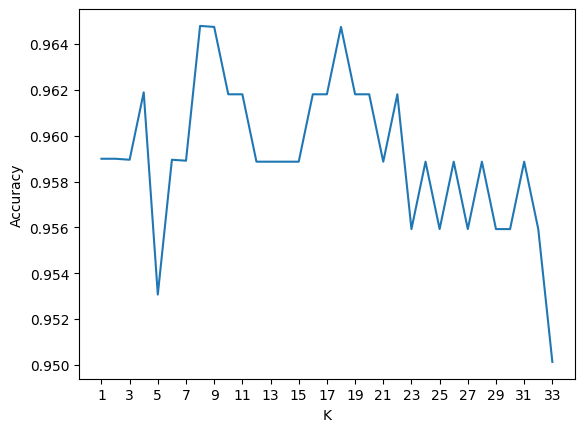

In [ ]:
plt.plot(range(1,(xtrain.shape[0]//10)),scores_tr)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(range(1,(xtrain.shape[0]//10),2))
plt.show()

In [ ]:
m=max(scores_tr)
m
lstk=[]
for i in range(len(scores_tr)):
  if scores_tr[i]==max(scores_tr):
    lstk.append(i+1)
best_k=max(lstk)

In [ ]:
best_k

8

In [ ]:
#Best value of k=5

In [ ]:
#We select weights to be distance based and number of neighbors to be 8

In [ ]:
KNN=KNeighborsClassifier(n_neighbors=8,weights='distance')
KNN.fit(xtrain,ytrain)
ypred=KNN.predict(xtest)

In [ ]:
accuracy_score(ytest,ypred)

0.9692982456140351

In [ ]:
precision_score(ytest,ypred)

0.9879518072289156

In [ ]:
recall_score(ytest,ypred)

0.9318181818181818

In [ ]:
f1_score(ytest,ypred)

0.9585798816568047

In [ ]:
confusion_matrix(ytest,ypred)

array([[140,   0],
       [  7,  81]])

# Logistic Regression on original variables

In [ ]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data.sort_values(by='VIF',ascending=False)

,Feature,VIF
0,radius_mean,3806.115296
2,perimeter_mean,3786.400419
20,radius_worst,799.105946
22,perimeter_worst,405.023336
3,area_mean,347.878657
23,area_worst,337.221924
10,radius_se,75.462027
6,concavity_mean,70.767720
12,perimeter_se,70.359695
7,concave points_mean,60.041733


In [ ]:
lr=LogisticRegression(max_iter=100000)
prarm={'C':[0.0001,0.001,0.01,0.1,1,3,4,5,8,10,20,30],'solver':['sag','saga'],'penalty':['l1','l2']}
grid=GridSearchCV(lr,prarm,cv=5,scoring='accuracy')
grid.fit(xtrain,ytrain)
grid.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

{'C': 3, 'penalty': 'l1', 'solver': 'saga'}

In [ ]:
ypred=grid.predict(xtest)

In [ ]:
accuracy_score(ytest,ypred)

0.9605263157894737

In [ ]:
f1_score(ytest,ypred)

0.9473684210526315

In [ ]:
confusion_matrix(ytest,ypred)

array([[138,   2],
       [  7,  81]])

# Logistic Regression after addressing multicollinearity

In [ ]:
pca=PCA(n_components=10)
pca.fit(xtrain)

PCA(n_components=10)

In [ ]:
pca.explained_variance_ratio_

array([0.45836316, 0.1802744 , 0.09198182, 0.07148077, 0.0494123 ,
       0.04550111, 0.02223039, 0.0147598 , 0.01245471, 0.01083487])

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.45836316, 0.63863756, 0.73061938, 0.80210015, 0.85151244,
       0.89701355, 0.91924394, 0.93400375, 0.94645846, 0.95729333])

In [ ]:
xtrain_pca=pca.transform(xtrain)
xtest_pca=pca.transform(xtest)

In [ ]:
pca_alpha=np.transpose(pd.DataFrame(pca.components_))

In [ ]:
pcs=np.dot(xtrain,pca_alpha)

In [ ]:
pcs=pd.DataFrame(pcs)

In [ ]:
lr=LogisticRegression(max_iter=100000)
prarm={'C':[0.0001,0.001,0.01,0.1,1,3,5,8,10,20,30],'solver':['sag','saga'],'penalty':['l1','l2']}
grid=GridSearchCV(lr,prarm,cv=5,scoring='accuracy')
grid.fit(xtrain_pca,ytrain)
grid.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
55 fits failed out of a total of 220.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

{'C': 1, 'penalty': 'l2', 'solver': 'sag'}

In [ ]:
ypred=grid.predict(xtest_pca)

In [ ]:
accuracy_score(ytest,ypred)

0.9692982456140351

In [ ]:
f1_score(ytest,ypred)

0.9590643274853801

In [ ]:
confusion_matrix(ytest,ypred)

array([[139,   1],
       [  6,  82]])